In [2]:
%pip install pandas
%pip install geopandas
%pip install folium
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 61.4 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.6/27.6 MB 56.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 94.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [78]:
%pip install geodatasets
%pip install cartopy

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 66.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
from geodatasets import get_path
import geodatasets
#path_to_file = get_path('nybb') #geoda.grid100
p = get_path('geoda.grid100')

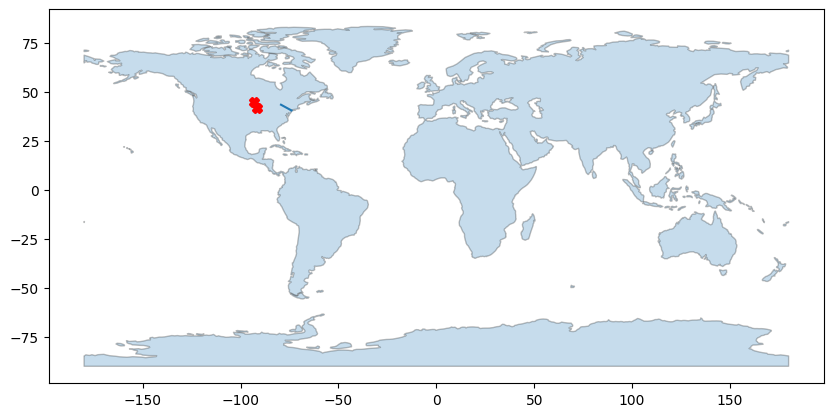

In [64]:
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt


df1 = pd.DataFrame(
    {'City': ['ST. GEORGE', 'Toronto'],
     'Country': ['Canada','Canada'],
     'Latitude': [40.7128, 43.6532],
     'Longitude': [-74.0060, -79.3832]})

#gdf = geopandas.GeoDataFrame(df1, geometry=geopandas.points_from_xy(df1.Longitude, df1.Latitude))

##[-91.665627, -93.26384], [41.977879, 44.97997]
gdf = geopandas.GeoDataFrame(df1, geometry=geopandas.points_from_xy([-91.665627, -93.26384], [41.977879, 44.97997]))
world = geopandas.read_file(geodatasets.get_path('naturalearth.land'))
#world = geopandas.read_file(p)#nybb #naturalearth_lowres
#path_to_file
#ax = world[world.continent == 'North America'].plot(alpha=0.25, figsize=(10,10), edgecolor='k')
ax = world.plot(alpha=0.25, figsize=(10,10), edgecolor='k')


# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red', marker = 'X', linestyle='solid', linewidth=2)

#plt.show()

plt.plot([-74.0060, -79.3832], [40.7128, 43.6532])


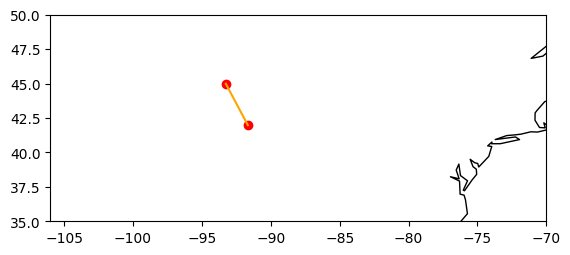

In [69]:
usa = geopandas.read_file(geodatasets.get_path('geoda.natregimes'))
world = geopandas.read_file(geodatasets.get_path('naturalearth.land'))
world.crs
usa.crs

minx, miny, maxx, maxy = -106, 35, -70, 50

#ax = usa.plot()
#ax = usa.plot(cmap='OrRd')
#ax = usa.plot(facecolor="none", edgecolor="black")
ax = world.plot(facecolor="none", edgecolor="black")


ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

df1 = pd.DataFrame(
    {'City': ['Cedar Rapids', 'Minneapolis'],
     'Country': ['USA','USA'],
     'Latitude': [41.977879, 44.97997],
     'Longitude': [-91.665627, -93.26384]})
#41.977879, -91.665627

#44.97997, -93.26384
gdf = geopandas.GeoDataFrame(df1, geometry=geopandas.points_from_xy(df1.Longitude, df1.Latitude))
gdf.plot(ax=ax, color='red', marker = 'o', linestyle='solid', linewidth=1)
plt.plot([-91.665627, -93.26384], [41.977879, 44.97997],color='orange')



#minx, miny, maxx, maxy = -106, 35, -70, 70  # Example: Europe

# Create the plot
#fig, ax = plt.subplots(figsize=(10, 10))

# Plot the world map
#world.plot(ax=ax)

# Set the x and y limits to zoom
#ax.set_xlim(minx, maxx)
#ax.set_ylim(miny, maxy)

In [30]:
geodatasets.data


for i in geodatasets.data.flatten().keys():
    print(i)

geoda.airbnb
geoda.atlanta
geoda.cars
geoda.charleston1
geoda.charleston2
geoda.chicago_health
geoda.chicago_commpop
geoda.chile_labor
geoda.cincinnati
geoda.cleveland
geoda.grid100
geoda.groceries
geoda.guerry
geoda.health
geoda.health_indicators
geoda.hickory1
geoda.hickory2
geoda.home_sales
geoda.houston
geoda.juvenile
geoda.lansing1
geoda.lansing2
geoda.lasrosas
geoda.liquor_stores
geoda.malaria
geoda.milwaukee1
geoda.milwaukee2
geoda.ncovr
geoda.natregimes
geoda.ndvi
geoda.nepal
geoda.nyc
geoda.nyc_earnings
geoda.nyc_education
geoda.nyc_neighborhoods
geoda.orlando1
geoda.orlando2
geoda.oz9799
geoda.phoenix_acs
geoda.police
geoda.sacramento1
geoda.sacramento2
geoda.savannah1
geoda.savannah2
geoda.seattle1
geoda.seattle2
geoda.sids
geoda.sids2
geoda.south
geoda.spirals
geoda.stlouis
geoda.tampa1
geoda.us_sdoh
ny.bb
eea.large_rivers
abs.australia
abs.australia_states_territories
naturalearth.land


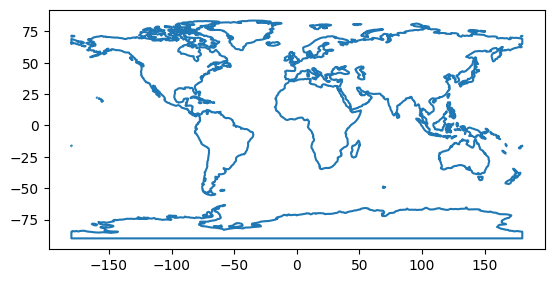

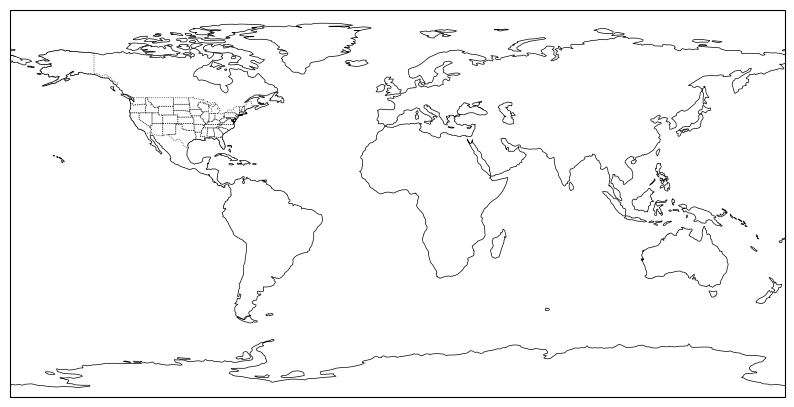

In [80]:
#geodatasets.get_path('geoda airbnb')

t = geopandas.read_file(geodatasets.get_path('naturalearth.land'))
#t.crs
#t = t.to_crs("EPSG:2953")
#ax = t.plot()
ax = t.boundary.plot()


import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a Cartopy projection
projection = ccrs.PlateCarree()

# Create a figure and axis with Cartopy projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': projection})

# Add coastlines
ax.coastlines(linewidth=0.5)

# Add U.S. state borders
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black', linewidth=0.5)
#plt.plot([-91.665627, -93.26384], [41.977879, 44.97997])
#t.boundary.plot();



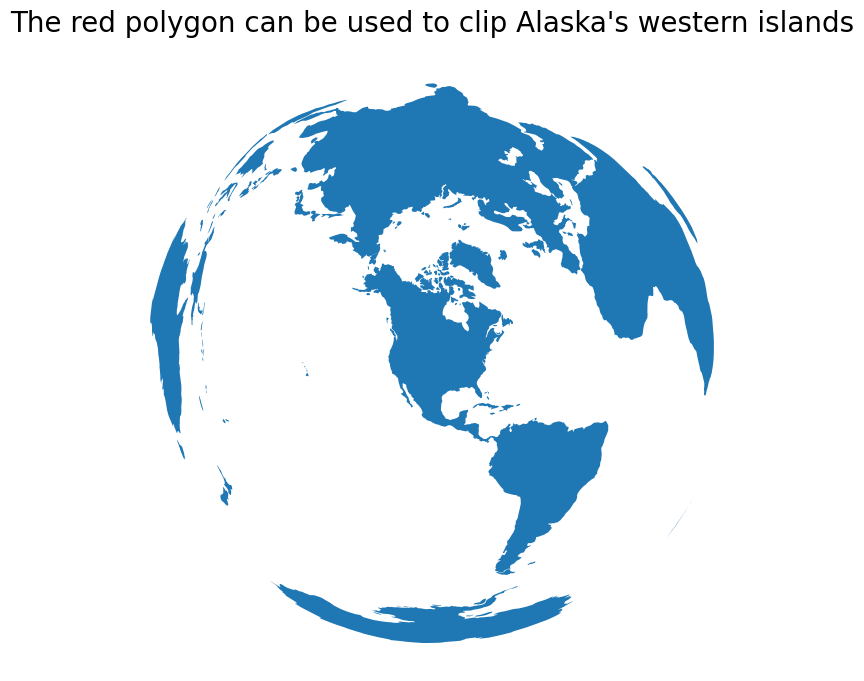

In [75]:
from shapely.geometry import Polygon
#world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = geopandas.read_file(geodatasets.get_path('naturalearth.land'))
#geopandas.to_crs({'init':'epsg:2163'})
world = world.to_crs("epsg:2163")

# NOTE: the convention for polygon points is (Long, Lat)....counterintuitive
polygon = Polygon([(-175,50),(-175,72),(-140, 72),(-140,50)])
# polygon = Polygon([(-180,0),(-180,90),(-120,90),(-120,0)])

# polygon=hipolygon
poly_gdf = geopandas.GeoDataFrame( geometry=[polygon], crs=world.crs)

fig, ax1 = plt.subplots(1, figsize=(8, 18))
world.plot(ax=ax1)
poly_gdf.boundary.plot(ax = ax1, color="red")
ax1.set_title("The red polygon can be used to clip Alaska's western islands", fontsize=20)
ax1.set_axis_off()
plt.show()

#polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
# apply1(alaska_gdf,0,36)
#alaska_gdf.clip(polygon).plot( color='lightblue', linewidth=0.8, edgecolor='0.8')

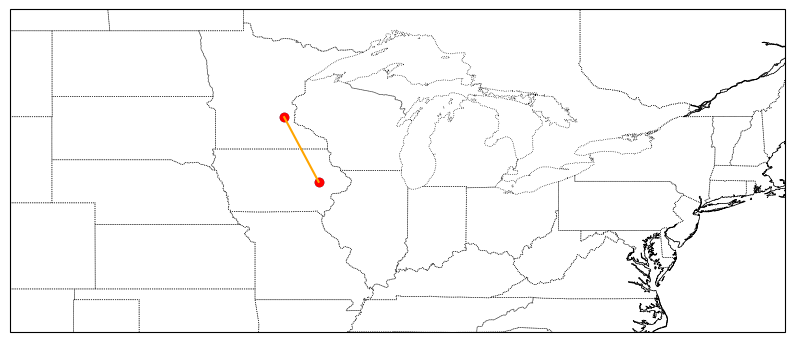

In [89]:
import cartopy.crs as ccrs
import cartopy.feature as creature

minx, miny, maxx, maxy = -106, 35, -70, 50
df1 = pd.DataFrame(
    {'City': ['Cedar Rapids', 'Minneapolis'],
     'Country': ['USA','USA'],
     'Latitude': [41.977879, 44.97997],
     'Longitude': [-91.665627, -93.26384]})

# Create a Cartopy projection
projection = ccrs.PlateCarree()
# Create a figure and axis with Cartopy projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': projection})
# Add coastlines
ax.coastlines(linewidth=0.5)
# Add U.S. state borders
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black', linewidth=0.5)
#gdf.plot(ax=ax)
# Set the extent to zoom in
ax.set_extent([minx, maxx, miny, maxy], crs=ccrs.PlateCarree())



gdf = geopandas.GeoDataFrame(df1, geometry=geopandas.points_from_xy(df1.Longitude, df1.Latitude))
gdf.plot(ax=ax, color='red', marker = 'o', linestyle='solid', linewidth=1)
plt.plot([-91.665627, -93.26384], [41.977879, 44.97997],color='orange')
#minx, maxx, miny, maxy

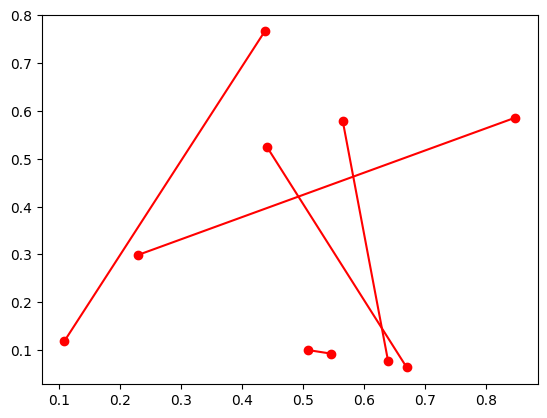

In [91]:
import numpy as np
import matplotlib.pyplot as plt

x, y = np.random.random(size=(2,10))

for i in range(0, len(x), 2):
    plt.plot(x[i:i+2], y[i:i+2], 'ro-')

plt.show()